<a href="https://colab.research.google.com/github/HarrisKucukalic/CSS2_Group_3/blob/main/Samuel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect to Google Drive, Import Libraries and Datasets

## Connect to drive and check Directory

In [293]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [294]:
%cd /content/gdrive/Shareddrives/CSS2 - Research /Research Code

/content/gdrive/Shareddrives/CSS2 - Research /Research Code


In [295]:
!ls

Angie.ipynb  Harris.ipynb  Samuel.ipynb   Timothy.ipynb
desktop.ini  Isaac.ipynb   Test_data.csv  Train_data.csv


## Import necessary libraries

In [296]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(rc={"figure.dpi":120, 'savefig.dpi':120})

# Smote
from imblearn.pipeline import make_pipeline
from imblearn.base import BaseSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import (SMOTE, RandomOverSampler)
from imblearn.combine import SMOTEENN, SMOTETomek

# sklearn
import sklearn as sk
from sklearn import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
# DT
from sklearn.tree import DecisionTreeClassifier
# kNN
# from sklearn.neighbors import KNeighborsClassifier
# RF
# from sklearn.ensemble import RandomForestClassifier
# SVM
from sklearn.svm import SVC
# NN (FNN - Binary classification)
import tensorflow as tf
from keras.layers import Dense, Dropout

## Intrusion Data

In [297]:
intrusion_data = pd.read_csv('Train_data.csv')
intrusion_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [298]:
intrusion_data['class'].value_counts()


normal     13449
anomaly    11743
Name: class, dtype: int64

In [299]:
value_counts = intrusion_data['class'].value_counts()
total_values = len(intrusion_data['class'].dropna())
percentages = (value_counts / total_values) * 100
print(percentages)

normal     53.385996
anomaly    46.614004
Name: class, dtype: float64


# Preprocessing

## Testing Data

In [300]:
for column in intrusion_data.columns:
    print(f"Counts for {column}:")
    print(intrusion_data[column].value_counts())
    print("------------")

Counts for duration:
0        23168
1          374
2          165
3          102
4           75
         ...  
17025        1
12892        1
584          1
10774        1
322          1
Name: duration, Length: 758, dtype: int64
------------
Counts for protocol_type:
tcp     20526
udp      3011
icmp     1655
Name: protocol_type, dtype: int64
------------
Counts for service:
http         8003
private      4351
domain_u     1820
smtp         1449
ftp_data     1396
             ... 
urh_i           4
red_i           3
pm_dump         3
tim_i           2
http_8001       1
Name: service, Length: 66, dtype: int64
------------
Counts for flag:
SF        14973
S0         7009
REJ        2216
RSTR        497
RSTO        304
S1           88
SH           43
RSTOS0       21
S2           21
S3           15
OTH           5
Name: flag, dtype: int64
------------
Counts for src_bytes:
0        9866
8         738
1         480
44        467
45        416
         ... 
3724        1
44788       1
1205    

#Attribute Analyses and Input selection

In [301]:
intrusion_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [302]:
intrusion_data = pd.read_csv('Train_data.csv')

In [303]:
intrusion_data_right = intrusion_data
intrusion_data_right['class_label'] = (intrusion_data_right['class'] == 'anomaly').astype(int)
intrusion_data_right = intrusion_data_right.drop(['class'], axis=1)
intrusion_data_right

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,1
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1


# Splitting Data

In [304]:
top_10_info_gain = intrusion_data[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','logged_in','dst_host_serror_rate','dst_host_srv_serror_rate', 'class_label']]

In [305]:
# top_10_info_gain =

In [306]:
from sklearn.model_selection import train_test_split
X = top_10_info_gain.drop(["class_label"], axis=1)
y = top_10_info_gain["class_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [307]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X = X_test[-2500:]
futureSample_y = y_test[-2500:]

# Remove the last two hundred samples from the test dataset
X_test = X_test[0:-2500]
y_test = y_test[0:-2500]

In [308]:
futureSample_X

,src_bytes,dst_bytes,diff_srv_rate,same_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,logged_in,dst_host_serror_rate,dst_host_srv_serror_rate
936,338,275,0.00,1.00,255,1.00,0.00,1,0.0,0.0
14663,156,11431,0.00,1.00,255,1.00,0.00,1,0.0,0.0
5853,0,0,0.06,0.16,17,0.11,0.07,0,1.0,1.0
2120,198,1705,0.00,1.00,255,1.00,0.00,1,0.0,0.0
20830,0,0,0.17,0.28,27,0.11,0.05,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1940,225,2239,0.00,1.00,241,0.95,0.01,1,0.0,0.0
14743,0,0,0.06,0.06,17,0.07,0.07,0,1.0,1.0
11205,146,0,0.67,0.33,1,0.00,0.71,0,0.0,0.0
21954,207,294,0.00,1.00,255,1.00,0.00,1,0.0,0.0


In [309]:
y_train.value_counts()

0    10816
1     9337
Name: class_label, dtype: int64

# Decision Tree

## Hyper Parameter tunning

In [310]:
#  from sklearn.model_selection import GridSearchCV
#  from sklearn.tree import DecisionTreeClassifier

# # Define the parameter grid to search
# param_grid = {
#     'criterion': ['entropy', 'gini'],
#     'max_depth': [None, 10, 20, 30, 40, 50],
#     'min_samples_split': [2, 5, 10, 15, 20],
#     'min_samples_leaf': [1, 2, 4, 8, 16]
# }

# # Create a decision tree classifier
# DT_classifier = DecisionTreeClassifier()

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=DT_classifier, param_grid=param_grid, cv=5)

# # Perform grid search on the training data
# grid_search.fit(X_train_resampled, y_train_resampled)

# # Get the best parameters and the best estimator
# best_params = grid_search.best_params_
# best_classifier = grid_search.best_estimator_
# print("Best Hyperparameters:", best_params)


## Train Decision Tree

In [311]:
# DT_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=40,
#                                        min_samples_leaf=1, min_samples_split=2)
DT_classifier = DecisionTreeClassifier(criterion='entropy')
DT_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

## Measure Decision Tree's performance

In [312]:
# Predict the class labels of samples in the test dataset
y_pred_DT = DT_classifier.predict(X_test)

In [313]:
score_test = accuracy_score(y_test, y_pred_DT)
print (score_test)

0.9940921622686096


In [314]:
precision_test = precision_score(y_test, y_pred_DT, average='macro')
print (precision_test)

0.9939297994948098


In [315]:
recall_test = recall_score(y_test, y_pred_DT, average='macro')
print (recall_test)

0.9942039896261239


In [316]:
f1_test =  f1_score(y_test, y_pred_DT, average='macro')
print(f1_test)

0.9940629824265215


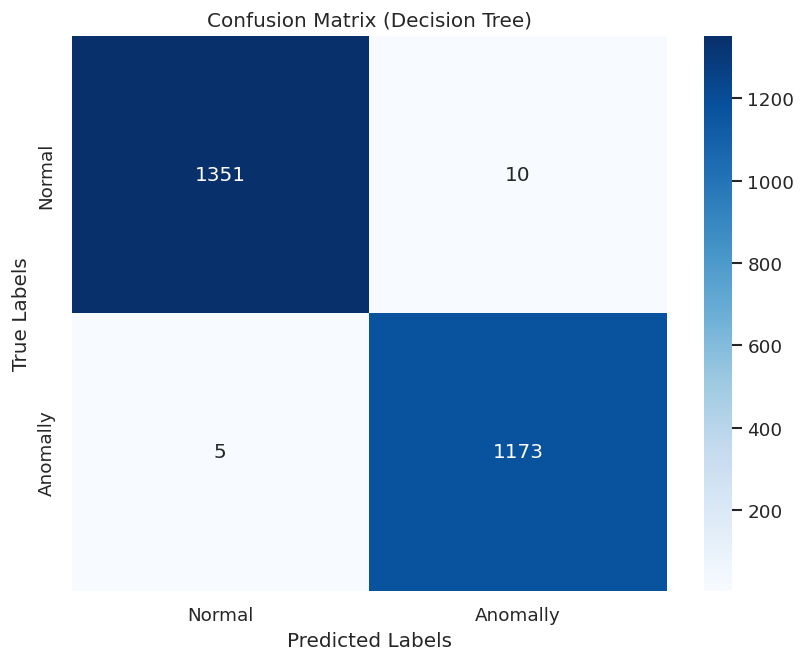

In [317]:
mat = confusion_matrix(y_test, y_pred_DT)
class_names = ["Normal", "Anomally"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Decision Tree)")
plt.show()

In [318]:
report = classification_report(y_test, y_pred_DT)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1361
           1       0.99      1.00      0.99      1178

    accuracy                           0.99      2539
   macro avg       0.99      0.99      0.99      2539
weighted avg       0.99      0.99      0.99      2539



## ROC Curve

The AUC is 0.994
Threshold	TPR vs FPR
2.000	0.000 vs 0.000
1.000	0.996 vs 0.007
0.000	1.000 vs 1.000


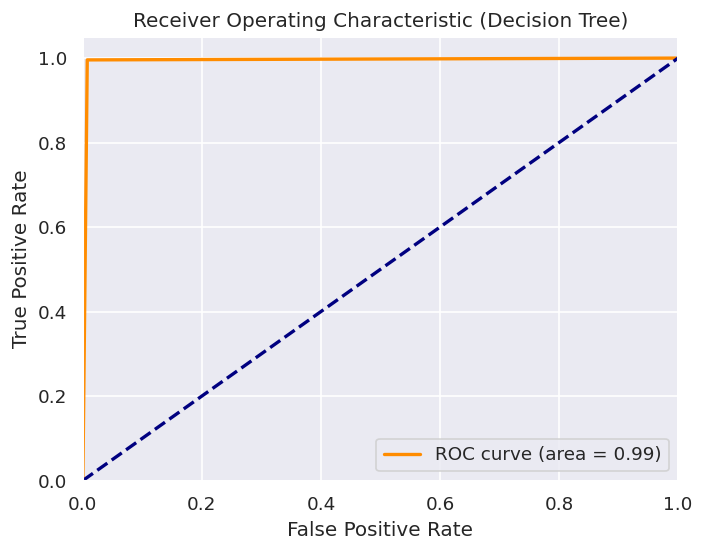

In [319]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = DT_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Decision Tree)')
plt.legend(loc="lower right")
plt.show()

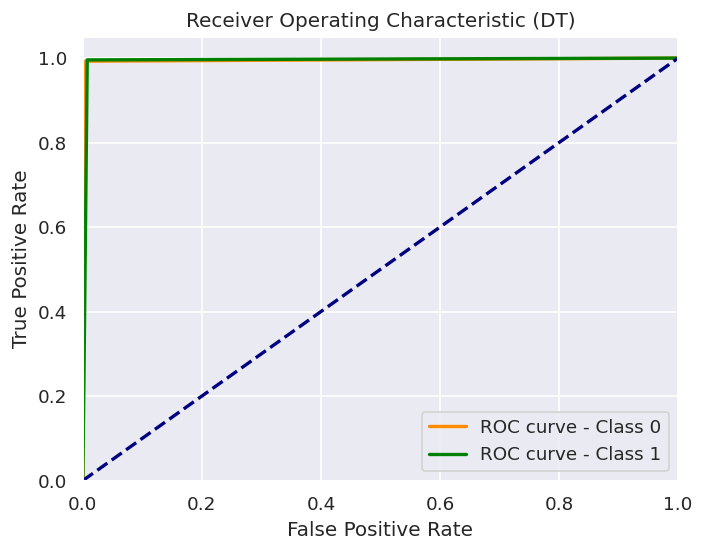

In [320]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = DT_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (DT)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [321]:
solution_validate = DT_classifier.predict(futureSample_X)

In [322]:
score_validate = accuracy_score(futureSample_y, solution_validate)
print (score_validate)

0.9948
